In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import random

#loading the data into a dataframe
df = pd.read_csv('weather.csv')
df.head(12)

,Day,MaxTemp,Rainfall,Evaporation
0,1,24.3,0.0,3.4
1,2,26.9,3.6,4.4
2,3,23.4,3.6,5.8
3,4,15.5,39.8,7.2
4,5,16.1,2.8,5.6
5,6,16.9,0.0,5.8
6,7,18.2,0.2,4.2
7,8,17.0,0.0,5.6
8,9,19.5,0.0,4.0
9,10,22.8,16.2,5.4


In [ ]:
#selecting random entries
l  = []
for i in range(10,300,90):
  l.append(random.randint(i,i+90))
l = [46,109,214,308]
x_plot = l
print(l)


[46, 109, 214, 308]


Linear Interpolation(Newton method)

In [ ]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])    
    return coef

In [ ]:
def newton_poly(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

Fortnightly data

[4.272756410256381, 4.531335331335352, 3.9289210789210767, 2.36123876123877]
3.8665655483374977


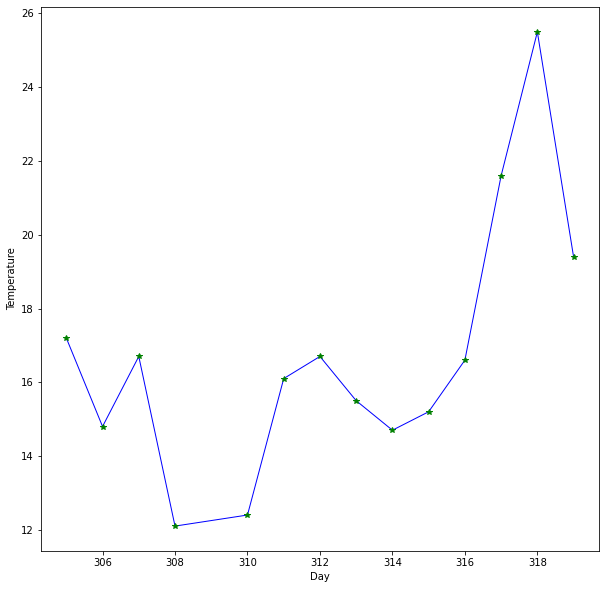

In [ ]:
#fortnightly data
df2 = df
l2 = []
l3 = []
err = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-7:l[j]+7])
  y = list(df2['MaxTemp'][l[j]-7:l[j]+7])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e5 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
print(e5)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
plt.plot(x1,y,color ='b',linewidth=1)
plt.plot(x1,y,'g*')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()



Weekly data

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
df2 = df
#weekly data
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-4:l[j]+3])
  y = list(df2['MaxTemp'][l[j]-4:l[j]+3])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e1 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e1


3.350770074281874


[4.699999999999996, 1.937142857142856, 2.8095238095238084, 3.342857142857154]

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
df2 = df
#10 day data
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-5:l[j]+5])
  y = list(df2['MaxTemp'][l[j]-5:l[j]+5])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e9 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e9


3.56347808111408


[3.777380952380941, 3.791904761904757, 3.8866666666666667, 2.653333333333345]

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
df2 = df
#2 day data
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-2:l[j]+2])
  y = list(df2['MaxTemp'][l[j]-2:l[j]+2])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e13 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e13


6.030289575228617


[2.1833333333333336,
 1.8249999999999957,
 4.9999999999999964,
 10.599999999999971]

Lagrange Interpolation

In [ ]:
def Lagrange_Interpolation(x,y,x_find):
  n = len(x)
  y_find = 0
  for i in range(n):
    p = 1
    for j in range(n):
      if i != j:
        p = p * (x_find - x[j])/(x[i] - x[j])
    y_find = y_find + p*y[i]
  return y_find

Fortnightly data

In [ ]:
df = pd.read_csv('weather.csv')

3.866565548337495


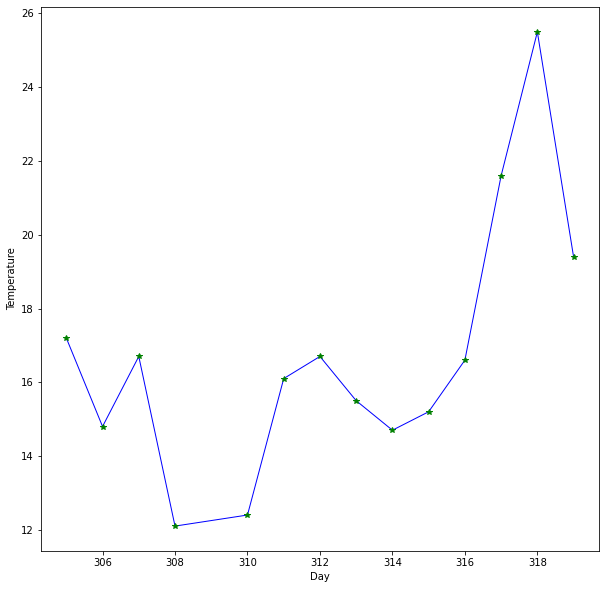

In [ ]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-7:l[j]+7])
  y = list(df2['MaxTemp'][l[j]-7:l[j]+7])
  y_new = Lagrange_Interpolation(x1, y, x)
  l3.append(y_new)
e6 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e6
plt.plot(x1,y,color ='b',linewidth=1)
plt.plot(x1,y,'g*')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()

Weekly data

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-4:l[j]+3])
  y = list(df2['MaxTemp'][l[j]-4:l[j]+3])
  y_new = Lagrange_Interpolation(x1, y, x)
  l3.append(y_new)
e2 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e2

3.3507700742818702


[4.699999999999992, 1.937142857142856, 2.8095238095238138, 3.3428571428571416]

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
#2 day data
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-2:l[j]+2])
  y = list(df2['MaxTemp'][l[j]-2:l[j]+2])
  y_new = Lagrange_Interpolation(x1, y, x)
  l3.append(y_new)
e14 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e14

6.030289575228629


[2.1833333333333336, 1.8249999999999957, 4.999999999999993, 10.599999999999998]

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
#10 day data
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-5:l[j]+5])
  y = list(df2['MaxTemp'][l[j]-5:l[j]+5])
  y_new = Lagrange_Interpolation(x1, y, x)
  l3.append(y_new)
e10 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e10

3.5634780811140807


[3.777380952380952, 3.791904761904746, 3.886666666666665, 2.6533333333333537]

Cubic Spline method

In [ ]:
def jacobi(A, b, x0, tol, n_iterations=300):
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    counter = 0
    x_diff = tol+1
    
    while (x_diff > tol) and (counter < n_iterations): #iteration level
        for i in range(0, n): #element wise level for x
            s = 0
            for j in range(0,n): #summation for i !=j
                if i != j:
                    s += A[i,j] * x_prev[j] 
            
            x[i] = (b[i] - s) / A[i,i]
        #update values
        counter += 1
        x_diff = (np.sum((x-x_prev)**2))**0.5 
        x_prev = x.copy() #use new x for next iteration
    return x

In [ ]:
def cubic_spline(x, y, tol = 1e-100):
    x = np.array(x)
    y = np.array(y)
    ### check if sorted
    if np.any(np.diff(x) < 0):
        idx = np.argsort(x)
        x = x[idx]
        y = y[idx]

    size = len(x)
    delta_x = np.diff(x)
    delta_y = np.diff(y)
    
    ### Get matrix A
    A = np.zeros(shape = (size,size))
    b = np.zeros(shape=(size,1))
    A[0,0] = 1
    A[-1,-1] = 1
    
    for i in range(1,size-1):
        A[i, i-1] = delta_x[i-1]
        A[i, i+1] = delta_x[i]
        A[i,i] = 2*(delta_x[i-1]+delta_x[i])
    ### Get matrix b
        b[i,0] = 3*(delta_y[i]/delta_x[i] - delta_y[i-1]/delta_x[i-1])
        
    ### Solves for c in Ac = b
    c = jacobi(A, b, np.zeros(len(A)), tol = tol, n_iterations=1000)
    
    ### Solves for d and b
    d = np.zeros(shape = (size-1,1))
    b = np.zeros(shape = (size-1,1))
    for i in range(0,len(d)):
        d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
        b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    
    
    return b.squeeze(), c.squeeze(), d.squeeze()

In [ ]:
def polynomial(x,y,x1,p,a):
  l = cubic_spline(x, y, tol = 1e-100)
  y1 = a + l[0][p-1]*(x1-x[p-1]) + l[1][p-1]*(x1-x[p-1])**2 + l[2][p-1]*(x1-x[p-1])**3
  return y1

Weekly data

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:

df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-4:l[j]+3])
  y = list(df2['MaxTemp'][l[j]-4:l[j]+3])
  y_new = polynomial(x,y,x1,4,a)
  l3.append(y_new)
e3 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e3

8.930182320464143


[2.2803509781357896,
 0.6918296892980464,
 11.717978848413622,
 13.266611018363854]

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-5:l[j]+5])
  y = list(df2['MaxTemp'][l[j]-5:l[j]+5])
  y_new = polynomial(x,y,x1,5,a)
  l3.append(y_new)
e11 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e11

9.036173292381962


[2.3500000000000014,
 0.47743789231721934,
 11.122003696612168,
 14.041378063115927]

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
#4 day data
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-2:l[j]+2])
  y = list(df2['MaxTemp'][l[j]-2:l[j]+2])
  y_new = polynomial(x,y,x1,2,a)
  l3.append(y_new)
e15 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e15

16.88315135482486


[1.7687500000000007,
 0.052173913043475295,
 9.879999999999995,
 32.23999999999994]

Fortnightly data

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:

df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-7:l[j]+7])
  y = list(df2['MaxTemp'][l[j]-7:l[j]+7])
  y_new = polynomial(x,y,x1,7,a)
  l3.append(y_new)
e7 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e7

9.283029051303425


[2.349776156524623, 0.5461568290963612, 10.958417887529318, 14.791614367739264]

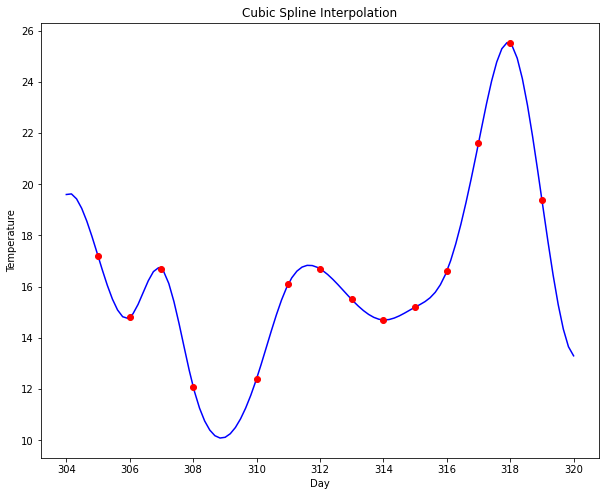

In [ ]:
from scipy.interpolate import CubicSpline

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(304, 320, 100)
y_new = f(x_new)
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()

In [ ]:
def LeastSq(x,y,x1):
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  n = len(x)
  numer = 0
  denom = 0
  for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
  y = m*x1 + c
  return y

Fortnightly

In [ ]:
df = pd.read_csv('weather.csv')

2.1876913790228034


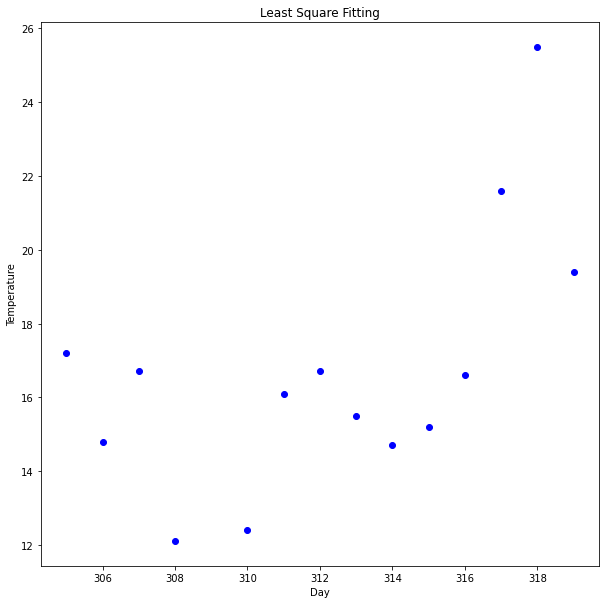

In [ ]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-7:l[j]+7])
  y = list(df2['MaxTemp'][l[j]-7:l[j]+7])
  y_new = LeastSq(x,y,x1)
  l3.append(y_new)
e8 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e8
plt.title('Least Square Fitting')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.scatter(x,y,color ='b',linewidth=1)
plt.show()

Weekly

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
df2 = df
l2 = []
l3 = []
err = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-4:l[j]+3])
  y = list(df2['MaxTemp'][l[j]-4:l[j]+3])
  y_new = LeastSq(x,y,x1)
  l3.append(y_new)
e4 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e4

1.2644364406373685


[1.3986301369863021,
 0.3780821917808268,
 0.09565217391304515,
 2.070491803278724]

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-2:l[j]+2])
  y = list(df2['MaxTemp'][l[j]-2:l[j]+2])
  y_new = LeastSq(x,y,x1)
  l3.append(y_new)
e16 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e16

3.4262194499751066


[1.5250000000000092, 0.15714285714285836, 2.100000000000005, 6.339999999999986]

In [ ]:
df = pd.read_csv('weather.csv')

In [ ]:
#10day
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-5:l[j]+5])
  y = list(df2['MaxTemp'][l[j]-5:l[j]+5])
  y_new = LeastSq(x,y,x1)
  l3.append(y_new)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e12 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
e12

1.7955155089991777


[1.9399999999999977,
 0.10707070707070798,
 0.475000000000005,
 2.9824175824176073]

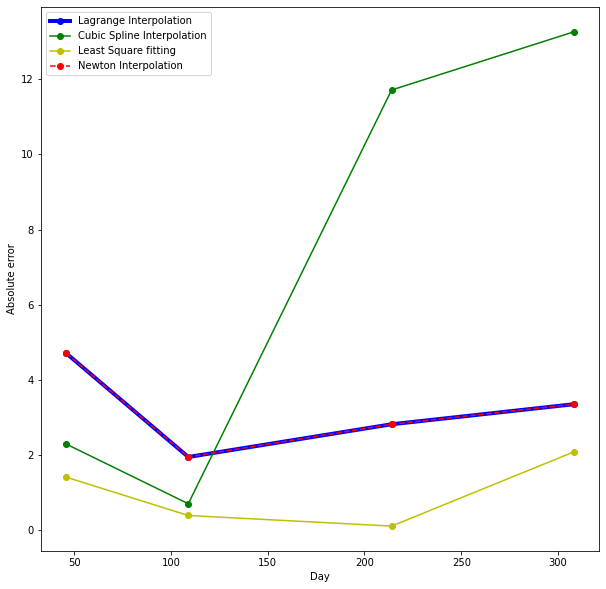

In [ ]:
#Weekly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)



 # plotting t, a separately 
plt.plot(x_plot, e2, marker = 'o',color ='b',linewidth=4,label = 'Lagrange Interpolation' ) # plotting t, b separately 
plt.plot(x_plot, e3, marker = 'o',color = 'g',label = 'Cubic Spline Interpolation')
plt.plot(x_plot,e4, marker = 'o',color ='y',label ='Least Square fitting') 
plt.plot(x_plot, e1, marker = 'o',color = 'r',linestyle='--',label = 'Newton Interpolation')# plotting t, c separately 
leg = plt.legend()
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

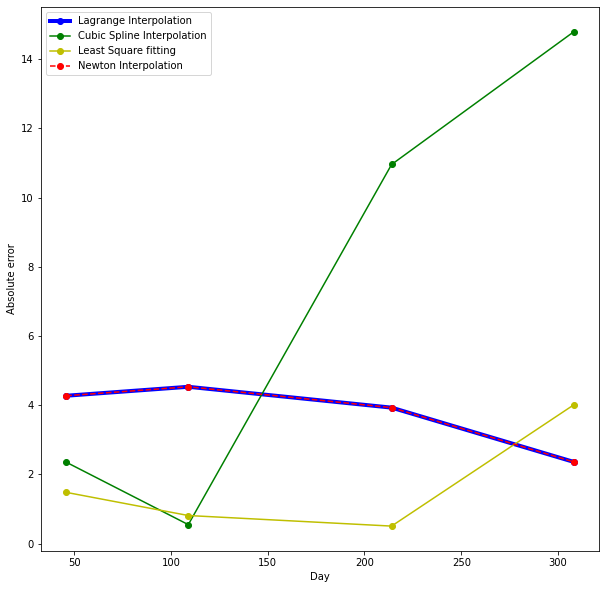

In [ ]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e6, marker = 'o',color ='b',linewidth=4,label = 'Lagrange Interpolation' ) # plotting t, b separately 
plt.plot(x_plot, e7, marker = 'o',color = 'g',label = 'Cubic Spline Interpolation')
plt.plot(x_plot,e8, marker = 'o',color ='y',label ='Least Square fitting') 
plt.plot(x_plot, e5, marker = 'o',color = 'r',linestyle='--',label = 'Newton Interpolation')# plotting t, c separately 
leg = plt.legend();
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

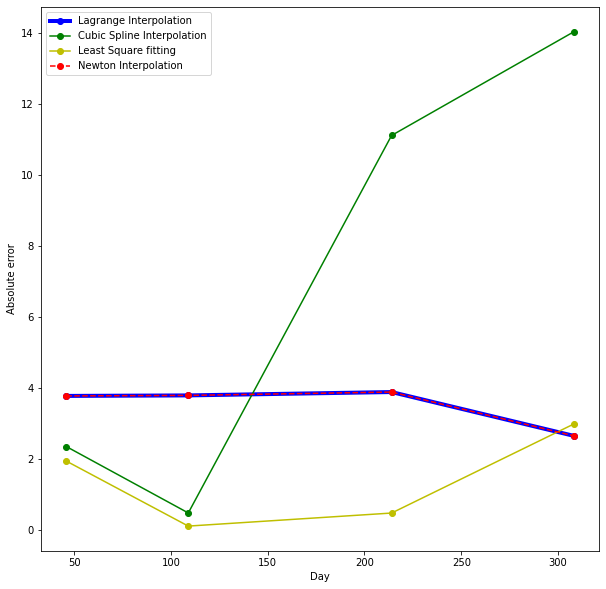

In [ ]:
#10 data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)



 # plotting t, a separately 
plt.plot(x_plot, e10, marker = 'o',color ='b',linewidth=4,label = 'Lagrange Interpolation' ) # plotting t, b separately 
plt.plot(x_plot, e11, marker = 'o',color = 'g',label = 'Cubic Spline Interpolation')
plt.plot(x_plot,e12, marker = 'o',color ='y',label ='Least Square fitting') 
plt.plot(x_plot, e9, marker = 'o',color = 'r',linestyle='--',label = 'Newton Interpolation')# plotting t, c separately 
leg = plt.legend()
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

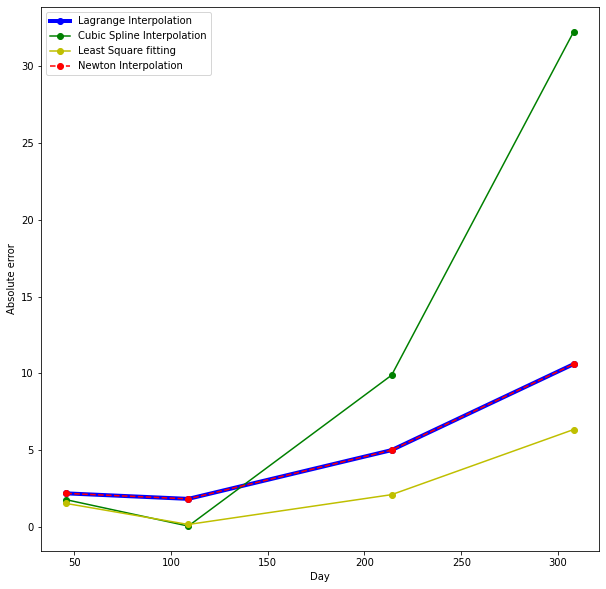

In [ ]:
#4 data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)



 # plotting t, a separately 
plt.plot(x_plot, e14, marker = 'o',color ='b',linewidth=4,label = 'Lagrange Interpolation' ) # plotting t, b separately 
plt.plot(x_plot, e15, marker = 'o',color = 'g',label = 'Cubic Spline Interpolation')
plt.plot(x_plot,e16, marker = 'o',color ='y',label ='Least Square fitting') 
plt.plot(x_plot, e13, marker = 'o',color = 'r',linestyle='--',label = 'Newton Interpolation')# plotting t, c separately 
leg = plt.legend()
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

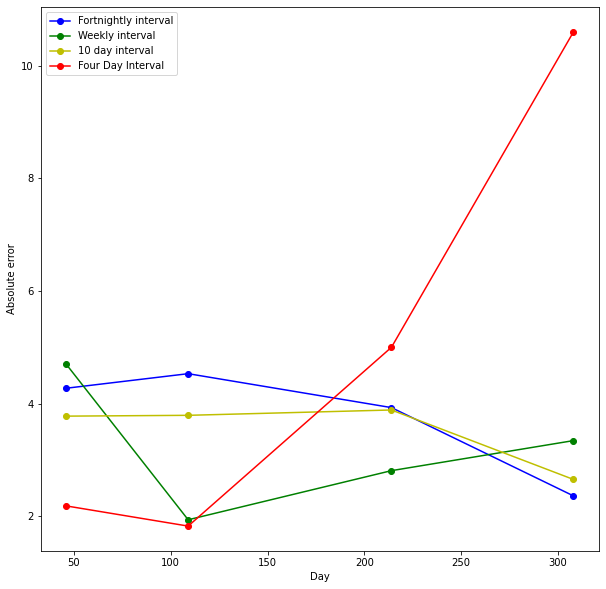

In [ ]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e5, marker = 'o',color ='b',label = 'Fortnightly interval' ) # plotting t, b separately 
plt.plot(x_plot, e1, marker = 'o',color = 'g',label = 'Weekly interval')
plt.plot(x_plot,e9, marker = 'o',color ='y',label ='10 day interval') 
plt.plot(x_plot, e13, marker = 'o',color = 'r',label = 'Four Day Interval')# plotting t, c separately 
leg = plt.legend()
plt.title("Newton Interpolation")
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

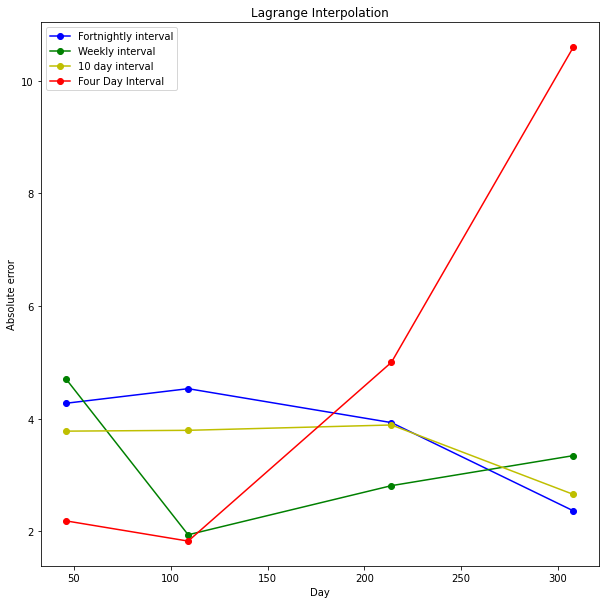

In [ ]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e6, marker = 'o',color ='b',label = 'Fortnightly interval' ) # plotting t, b separately 
plt.plot(x_plot, e2, marker = 'o',color = 'g',label = 'Weekly interval')
plt.plot(x_plot,e10, marker = 'o',color ='y',label ='10 day interval') 
plt.plot(x_plot, e14, marker = 'o',color = 'r',label = 'Four Day Interval')# plotting t, c separately 
leg = plt.legend()
plt.title("Lagrange Interpolation")
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

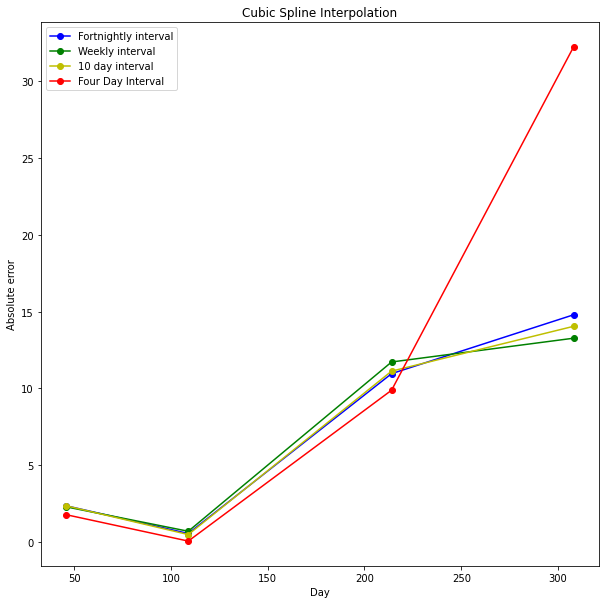

In [ ]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e7, marker = 'o',color ='b',label = 'Fortnightly interval' ) # plotting t, b separately 
plt.plot(x_plot, e3, marker = 'o',color = 'g',label = 'Weekly interval')
plt.plot(x_plot,e11, marker = 'o',color ='y',label ='10 day interval') 
plt.plot(x_plot, e15, marker = 'o',color = 'r',label = 'Four Day Interval')# plotting t, c separately 
leg = plt.legend()
plt.title("Cubic Spline Interpolation")
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

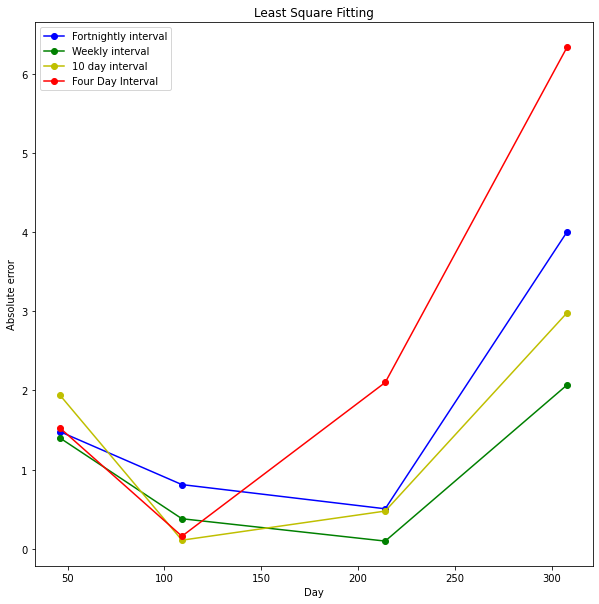

In [ ]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e8, marker = 'o',color ='b',label = 'Fortnightly interval' ) # plotting t, b separately 
plt.plot(x_plot, e4, marker = 'o',color = 'g',label = 'Weekly interval')
plt.plot(x_plot,e12, marker = 'o',color ='y',label ='10 day interval') 
plt.plot(x_plot, e16, marker = 'o',color = 'r',label = 'Four Day Interval')# plotting t, c separately 
leg = plt.legend()
plt.title("Least Square Fitting")
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()